### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
# Check for missing data
missing_data = data.isnull().sum()
missing_data

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [10]:
# Check for any obvious signs of problematic data (e.g., unexpected data types, impossible values)
data_types = data.dtypes
summary_statistics = data.describe(include='all')

data_types, summary_statistics

(destination             object
 passanger               object
 weather                 object
 temperature              int64
 time                    object
 coupon                  object
 expiration              object
 gender                  object
 age                     object
 maritalStatus           object
 has_children             int64
 education               object
 occupation              object
 income                  object
 car                     object
 Bar                     object
 CoffeeHouse             object
 CarryAway               object
 RestaurantLessThan20    object
 Restaurant20To50        object
 toCoupon_GEQ5min         int64
 toCoupon_GEQ15min        int64
 toCoupon_GEQ25min        int64
 direction_same           int64
 direction_opp            int64
 Y                        int64
 dtype: object,
             destination passanger weather   temperature   time        coupon  \
 count             12684     12684   12684  12684.000000  12684        

The car column has 12,576 missing values

There are missing values in the Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 columns

The data types for each column are generally as expected, with categorical data represented as object and numerical data as int64.


3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# Dropping the 'car' column due to a large number of missing values
data_cleaned = data.drop(columns=['car'])

In [14]:
# For other columns with missing values, replace missing values with the mode (most frequent value)
columns_with_missing_values = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in columns_with_missing_values:
    mode_value = data_cleaned[column].mode()[0]  # Get the mode value for the column
    data_cleaned[column].fillna(mode_value, inplace=True)  # Replace missing values with the mode

In [16]:
# Verify if missing values have been addressed
missing_data_after_cleaning = data_cleaned.isnull().sum()

missing_data_after_cleaning

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [19]:
# Calculate the proportion of observations that accepted the coupon
proportion_accepted = data_cleaned['Y'].mean()  # Mean will give the proportion of '1's in the column

proportion_accepted

0.5684326710816777

 Approximately 56.84% of the respondents chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

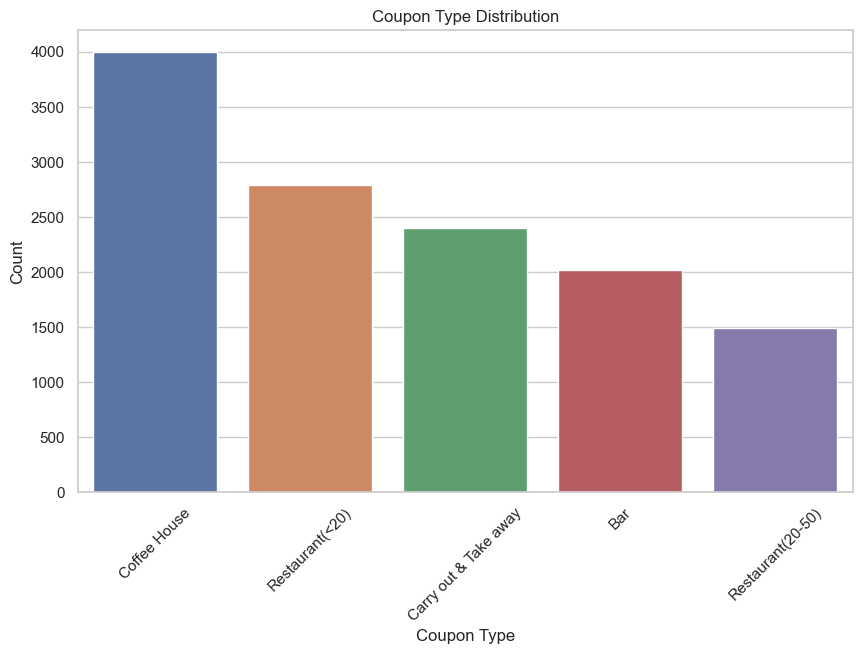

In [22]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Bar plot for the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='coupon', order=data_cleaned['coupon'].value_counts().index)
plt.title('Coupon Type Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Coupon Type')

plt.show()

The bar plot reveals the frequency of each coupon type offered to respondents. Coffee House coupons are the most frequently offered, followed by coupons for restaurants with expenses under $20. Carry out & Take away, Bar, and more expensive restaurants ($20 - $50) coupons are less common but still significant.

6. Use a histogram to visualize the temperature column.

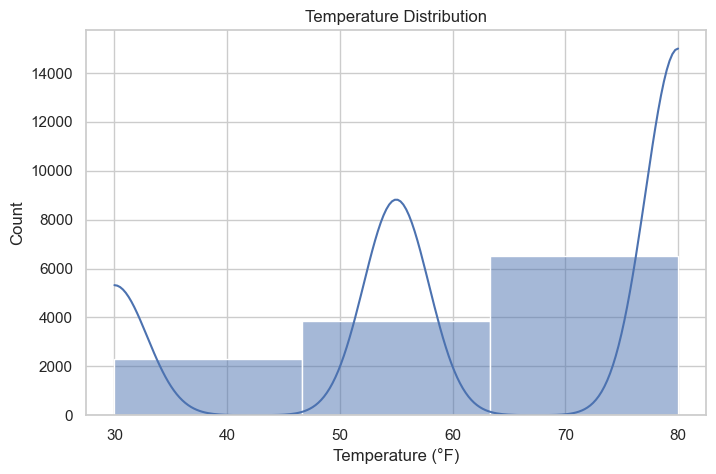

In [24]:
# Histogram for the 'temperature' column
plt.figure(figsize=(8, 5))
sns.histplot(data=data_cleaned, x='temperature', bins=3, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')

plt.show()

The histogram for temperature shows peaks around 55°F and 80°F, indicating that most of the data points (scenarios described in the dataset) occur under relatively mild (55°F) and warm (80°F) conditions. There's a smaller representation of colder weather (30°F), suggesting fewer observations or scenarios involving cold temperatures.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [25]:
# Create a new DataFrame that contains just the bar coupons
bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar']

bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [26]:
# Calculate the proportion of bar coupons that were accepted
proportion_bar_coupons_accepted = bar_coupons_df['Y'].mean()

proportion_bar_coupons_accepted

0.41001487357461575

The proportion of bar coupons that were accepted is approximately 41.00%.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [29]:
# Mapping the 'Bar' column to a numerical representation for easier comparison
# Assuming 'never' = 0, 'less1' = 0.5, '1~3' = 2 (average of the range), '4~8' = 6, 'gt8' = 9
bar_visit_mapping = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}

# Apply mapping to the 'Bar' column
bar_coupons_df['Bar_numeric'] = bar_coupons_df['Bar'].map(bar_visit_mapping)

# Compare the acceptance rate
acceptance_rate_less_equal_3 = bar_coupons_df[bar_coupons_df['Bar_numeric'] <= 3]['Y'].mean()
acceptance_rate_more_than_3 = bar_coupons_df[bar_coupons_df['Bar_numeric'] > 3]['Y'].mean()

acceptance_rate_less_equal_3, acceptance_rate_more_than_3


/var/folders/rx/4psh00tn6bs4nskbyv97wzcm0000gp/T/ipykernel_31398/3551612103.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Bar_numeric'] = bar_coupons_df['Bar'].map(bar_visit_mapping)


(0.37073707370737075, 0.7688442211055276)

The acceptance rate of bar coupons is approximately 37.07% for those who go to a bar 3 or fewer times a month, and significantly higher at 76.88% for those who go to a bar more than 3 times a month. This suggests that frequent bar-goers are more likely to accept bar coupons.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [31]:
# Create a new column to identify the specific group of interest
# Drivers who go to a bar more than once a month and are over the age of 25
bar_coupons_df['bar_over_25'] = (bar_coupons_df['Bar_numeric'] > 0.5) & (bar_coupons_df['age'] > '25')

# Compare the acceptance rate
acceptance_rate_bar_over_25 = bar_coupons_df[bar_coupons_df['bar_over_25']]['Y'].mean()
acceptance_rate_others = bar_coupons_df[~bar_coupons_df['bar_over_25']]['Y'].mean()

acceptance_rate_bar_over_25, acceptance_rate_others


/var/folders/rx/4psh00tn6bs4nskbyv97wzcm0000gp/T/ipykernel_31398/3873576209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['bar_over_25'] = (bar_coupons_df['Bar_numeric'] > 0.5) & (bar_coupons_df['age'] > '25')


(0.6883720930232559, 0.33459357277882795)

The acceptance rate of bar coupons is approximately 68.84% for drivers who go to a bar more than once a month and are over the age of 25, compared to 33.46% for all others. This indicates a significant difference, with the specified group showing a much higher likelihood of accepting bar coupons.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [32]:
# Identify drivers based on the specified criteria
bar_coupons_df['specified_criteria'] = (bar_coupons_df['Bar_numeric'] > 0.5) & \
                                       (bar_coupons_df['passanger'] != 'Kid(s)') & \
                                       (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')

# Calculate acceptance rates
acceptance_rate_specified_criteria = bar_coupons_df[bar_coupons_df['specified_criteria']]['Y'].mean()
acceptance_rate_others_criteria = bar_coupons_df[~bar_coupons_df['specified_criteria']]['Y'].mean()

acceptance_rate_specified_criteria, acceptance_rate_others_criteria


/var/folders/rx/4psh00tn6bs4nskbyv97wzcm0000gp/T/ipykernel_31398/4233807129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['specified_criteria'] = (bar_coupons_df['Bar_numeric'] > 0.5) & \


(0.7132486388384754, 0.296043656207367)

The acceptance rate of bar coupons is approximately 71.32% for drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry, compared to 29.60% for all others. This suggests that the specified group is significantly more inclined to accept bar coupons.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [34]:
# Group 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
group_1_criteria = (bar_coupons_df['Bar_numeric'] > 0.5) & \
                   (bar_coupons_df['passanger'] != 'Kid(s)') & \
                   (bar_coupons_df['maritalStatus'] != 'Widowed')

# Group 2: Go to bars more than once a month and are under the age of 30
group_2_criteria = (bar_coupons_df['Bar_numeric'] > 0.5) & \
                   (bar_coupons_df['age'].isin(['below21', '21', '26', 'below25']))  # Including 'below21' and 'below25'

# Group 3: Go to cheap restaurants more than 4 times a month and income is less than $50K
# Assuming '4~8' and 'gt8' as more than 4 times a month
group_3_criteria = (bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & \
                   (bar_coupons_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

# Calculate acceptance rates for each group
acceptance_rate_group_1 = bar_coupons_df[group_1_criteria]['Y'].mean()
acceptance_rate_group_2 = bar_coupons_df[group_2_criteria]['Y'].mean()
acceptance_rate_group_3 = bar_coupons_df[group_3_criteria]['Y'].mean()

acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3


(0.7132486388384754, 0.7217391304347827, 0.45348837209302323)

Approximately 71.32% for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.
Approximately 72.17% for drivers who go to bars more than once a month and are under the age of 30.
Approximately 45.35% for drivers who go to cheap restaurants more than 4 times a month and have an income of less than $50,000.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, drivers who are more likely to accept bar coupons appear to be those who frequently visit bars (more than once a month) and are in certain demographics (e.g., not widowed, under the age of 30). These groups show a significantly higher acceptance rate compared to the overall population or other specified criteria. This suggests that familiarity and comfort with bar environments, along with demographic factors such as age and marital status, may play a crucial role in the likelihood of accepting bar-related coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

For this analysis, I will focus on "Coffee House" coupons which were one of the most frequently offered coupon types and try to explore the characteristics of passengers who accept coupons for "Coffee House"

In [36]:
# Create a new DataFrame that contains just the "Coffee House" coupons
coffee_house_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Coffee House']

# Display the first few rows to confirm
coffee_house_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [38]:
# Calculate the overall acceptance rate of "Coffee House" coupons
proportion_coffee_house_coupons_accepted = coffee_house_coupons_df['Y'].mean()

proportion_coffee_house_coupons_accepted


0.49924924924924924

The overall acceptance rate of "Coffee House" coupons is approximately 49.92%.

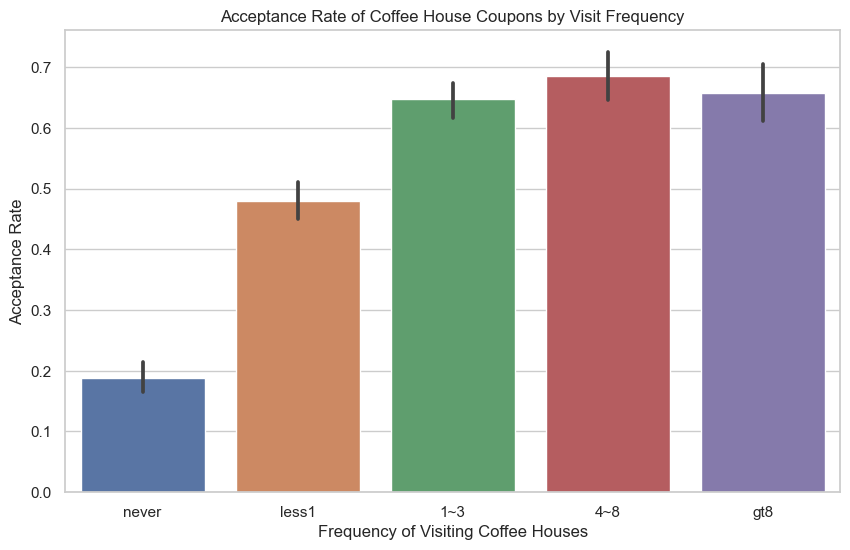

In [40]:
# Visualize the acceptance rate by frequency of visiting coffee houses
plt.figure(figsize=(10, 6))
sns.barplot(x='CoffeeHouse', y='Y', data=coffee_house_coupons_df, order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.title('Acceptance Rate of Coffee House Coupons by Visit Frequency')
plt.xlabel('Frequency of Visiting Coffee Houses')
plt.ylabel('Acceptance Rate')
plt.show()


The bar plot illustrates the acceptance rate of "Coffee House" coupons based on the frequency of visiting coffee houses. It shows a trend where individuals who visit coffee houses more frequently are generally more likely to accept the coupons, with the highest acceptance rates observed among those who visit coffee houses "1~3" times a month or more.

This finding suggests that familiarity and habitual patronage of coffee houses are significant factors influencing the likelihood of accepting coffee house-related coupons.